In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import htwt
from numpy.linalg import eigh, inv
from scipy.cluster.vq import whiten

In [2]:
X, y = htwt.get()
X = X[y == 1]

In [6]:
def contour(center, cov):
    vals, vecs = eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    nstd = 2
    width, height = 2 * nstd * np.sqrt(vals)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    return Ellipse(xy = center, width = width, height = height, angle = theta)

In [14]:
def scale(X):
    mean = np.mean(X, axis = 0)
    cov = np.cov(X, ddof = 0, rowvar = False)
    return (X - mean) / np.sqrt(np.diag(cov))

def whiten(X):
    cov = np.cov(X, ddof = 0, rowvar = False)
    lmbda, U = eigh(cov)
    Lambda = np.diag(lmbda)
    return (Lambda ** -0.5).dot(U.T).dot(X.T)

ValueError: too many values to unpack

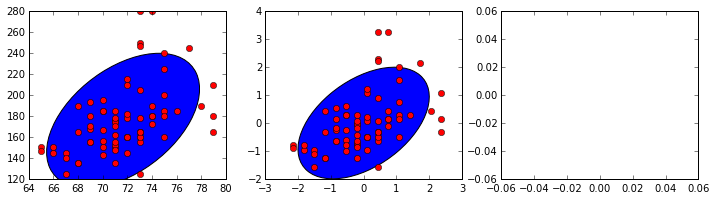

In [15]:
def draw(X):
    plt.plot(X[:, 0], X[:, 1], 'ro')
    x_bar = np.mean(X, axis = 0)
    Sigma = np.cov(X, ddof = 0, rowvar = False)
    plt.gca().add_artist(contour(x_bar, Sigma))

plt.figure(figsize = (12, 3))
plt.subplot(1, 3, 1) # aspect = 'equal')
draw(X)
plt.subplot(1, 3, 2)
draw(scale(X))
plt.subplot(1, 3, 3)
draw(whiten(X.T).T)
plt.tight_layout()
plt.show()